Calculation of Correlation: 0.88
Calculation of Correlation with NumPy's function: 0.88
Linear Model: ALGAED = 1.27 + 0.75 * AM


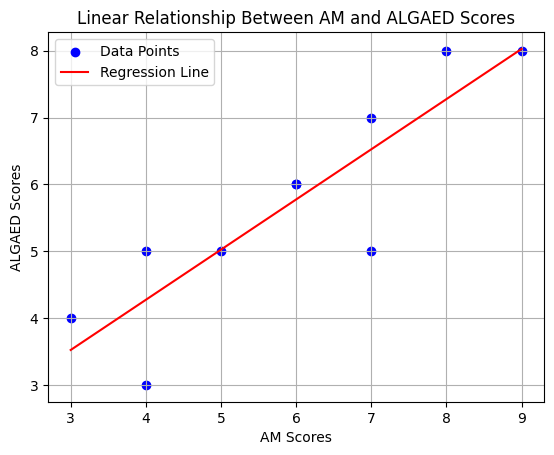

Predicted ALGAED Score for AM = 7: 6.53
95% Confidence Interval: (5.82, 7.24)


In [ ]:
#Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.stats import t

#Q1
#Defining scores for AM (Applied Mathematics) and ALGAED (Linear Algebra and Geometry)
am_scores = np.array([8, 3, 7, 6, 7, 5, 4, 9, 6, 4])  # Independent variable (X)
algaed_scores = np.array([8, 4, 5, 6, 7, 5, 5, 8, 6, 3]) # Dependent variable (Y)

# First Part:Calculating the correlation coefficient
# Calculate the mean of X and Y
mean_am = np.mean(am_scores) # Mean of AM scores
mean_algaed = np.mean(algaed_scores) # Mean of ALGAED scores
# Calculating covariance: Cov(X, Y) = mean((X - mean(X)) * (Y - mean(Y)))
covariance = np.mean((am_scores - mean_am) * (algaed_scores - mean_algaed))
# Calculating variance: Var(X) = mean((X - mean(X)) ** 2)
variance_am = np.mean((am_scores - mean_am) ** 2)
variance_algaed = np.mean((algaed_scores - mean_algaed) ** 2)
#Calculate correlation: corr(X, Y) = Cov(X, Y) / sqrt(Var(X) * Var(Y))
correlation = covariance / np.sqrt(variance_am * variance_algaed)

# Quickly compute correlation using np.corrcoef(X, Y)
formula_correlation = np.corrcoef(am_scores, algaed_scores)[0, 1]

# Results
print(f"Calculation of Correlation: {correlation:.2f}")
print(f"Calculation of Correlation with NumPy's function: {formula_correlation:.2f}")

# The correlation coefficient of 0.88 shows a strong positive relationship, indicating that students who perform well in AM tend to achieve similarly high scores in ALGAED.

# Second Part: Performing linear regression to calculate slope, intercept and other metrics
slope, intercept, r_value, p_value, std_err = linregress(am_scores, algaed_scores)
# Linear regression equation follows the formula:Y = β0 + β1 * X
# Y: The dependent variable (ALGAED scores)
# X: The independent variable (AM scores)
# β0: Intercept, the value of Y when X = 0
# β1: Slope, how much Y changes for a unit change in X

# Using intercept (β₀) and slope (β₁) to build the equation with {:.2f} for 2 decimal formatting
print(f"Linear Model: ALGAED = {intercept:.2f} + {slope:.2f} * AM")

# Displaying the data points and regression line
# A scatter plot for the original data points
plt.scatter(am_scores, algaed_scores, color='blue', label='Data Points')

# Regression equation: Y = intercept + slope * X
x_values = np.linspace(min(am_scores), max(am_scores), 100)  # Creating X values
y_values = intercept + slope * x_values  # Y values calculated using the regression equation

# Plotting the regression line
plt.plot(x_values, y_values, color='red', label='Regression Line')
plt.xlabel("AM Scores")
plt.ylabel("ALGAED Scores")
plt.title("Linear Relationship Between AM and ALGAED Scores")
plt.legend()
plt.grid(True)
plt.show()

# Third Part:Predicting ALGAED score for AM = 7
am_value = 7
predicted_score = intercept + slope * am_value
print(f"Predicted ALGAED Score for AM = {am_value}: {predicted_score:.2f}")

# Calculating standard error and confidence interval
n = len(am_scores)
# Residual Sum of Squares (SS_err): SS_err = Σ(y_i - (β0 + β1 * x_i))², measures the total error between actual and predicted values.
ss_err = np.sum((algaed_scores - (intercept + slope * am_scores))**2) # Residual Sum of Squares (SS_err)
# Variance of AM scores: Measures how spread out the AM values are around their mean
x_variance = np.sum((am_scores - mean_am)**2)
# Standard error of the prediction: Combines overall data variability (SS_err) and the distance of AM = 7 from the mean AM score.
se = np.sqrt((ss_err / (n - 2)) * (1/n + (am_value - mean_am)**2 / x_variance))

# Calculating t-value for 95% confidence
# 0.975 is for the upper 97.5% percentile (95% confidence interval), degrees of freedom = n-2
t_value = t.ppf(0.975, df=n-2)
# Calculating margin of error to determine the uncertainty range
margin_of_error = t_value * se
# Calculating confidence interval: range for the true ALGAED score at AM = 7
confidence_interval = (predicted_score - margin_of_error, predicted_score + margin_of_error)

# Results
print(f"95% Confidence Interval: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")

# Predicted ALGAED score for AM = 7: 6.53, directly from the regression equation.
# 95% Confidence Interval: (5.82, 7.24) - We are 95% confident the true mean ALGAED score lies within this range for AM = 7.
